# Yelp Dataset Challenge 

## Part I - Data Preprocessing

### Read data from file and load to Pandas DataFrame

##### The Challenge Dataset:

1. 5.997M reviews and 1.2M tips by 1.5M users for 189K businesses
2. Over 1.4M business attributes, e.g., hours, parking availability, ambience.
3. Aggregated check-ins over time for each of the 186K businesses
4. 280,992 pictures from the included businesses

##### Files:

1. yelp_academic_dataset_business.json
2. yelp_academic_dataset_checkin.json
3. yelp_academic_dataset_review.json
4. yelp_academic_dataset_tip.json
5. yelp_academic_dataset_user.json
6. yelp_academic_dataset_photo.json

##### Notes on the Dataset:

Each file is composed of a single object type, one json-object per-line.

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset/yelp_academic_dataset_business.json',
    'yelp_dataset/yelp_academic_dataset_checkin.json',
    'yelp_dataset/yelp_academic_dataset_review.json',
    'yelp_dataset/yelp_academic_dataset_tip.json',
    'yelp_dataset/yelp_academic_dataset_user.json'
]

## Exploratory analysis

First, we need to brainstorm possible ideas and actions to achieve the goal. To do this, we should go deep into the raw data, understanding the business, finding interesting patterns and making some decisions. Exploratory Data Analysis (EDA) is a good way to solve this problem. To begin with, let's get familiar with the data!

### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
# show the head of table
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{u'BusinessParking': u'{'garage': False, 'stre...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{u'Monday': u'8:30-17:0', u'Tuesday': u'11:0-2...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{u'RestaurantsTableService': u'False', u'GoodF...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


### Checkin Data

In [6]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
# show the head of table
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{u'Sun-18': 1, u'Fri-18': 1, u'Sun-16': 1, u'F..."
1,kREVIrSBbtqBhIYkTccQUg,"{u'Mon-13': 1, u'Thu-20': 1, u'Sun-19': 1, u'W..."


### Review Data

In [7]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
# show the head of table
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


### Tip Data

In [8]:
with open(file_tip) as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)
# show the head of table
df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA


### User Data

In [9]:
with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)
# show the head of table
df_user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05


## Filter data by city and category

### Create filters/masks

##### Create filters that selects business 
    * which are located in "Las Vegas"
    * which contains "Restaurants" in their category (You may need to filter null categories first)

Here, we focus more on the data analysis rather than predictive modeling. Thus, let's look at the data of the city in "Las Vegas" and with any categories first. 

In [10]:
# Create Pandas DataFrame filters
condition1 = df_business['city'] == 'Las Vegas'
condition2 = df_business['categories'].notnull() 

In [11]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business [condition1 & condition2]
df_filtered = df_filtered.loc[df_filtered.categories.apply(lambda cat: 'Restaurants' in cat)]
df_filtered

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
19,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
32,2255 N Rampart Blvd,"{u'RestaurantsTableService': u'False', u'GoodF...",kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,"{u'Monday': u'9:0-21:0', u'Tuesday': u'9:0-21:...",1,36.201794,-115.281981,Subway,Summerlin,89128,13,2.5,NV
33,2227 N Rampart Blvd,"{u'RestaurantsTableService': u'True', u'GoodFo...",0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,"{u'Monday': u'7:0-14:30', u'Tuesday': u'7:0-19...",1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV
61,7930 W Tropical Pkwy,"{u'RestaurantsReservations': u'False', u'HasTV...",JJEx5wIqs9iGGATOagE8Sg,"Mexican, Restaurants",Las Vegas,None,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,89149,4,2.0,NV
141,4505 E Bonanza Rd,"{u'RestaurantsTableService': u'False', u'GoodF...",zhxnD7J5_sCrKSw5cwI9dQ,"Chicken Wings, Restaurants, Fast Food",Las Vegas,"{u'Monday': u'10:0-23:0', u'Tuesday': u'10:0-2...",1,36.173140,-115.077945,Popeyes Louisiana Kitchen,Sunrise,89110,16,1.5,NV
143,"560 N. Nellis Blvd, Ste E1","{u'RestaurantsTableService': u'False', u'GoodF...",2kWrSFkIes_d2BMg4YrRtA,"Restaurants, Pizza",Las Vegas,"{u'Monday': u'11:0-23:0', u'Tuesday': u'11:0-2...",1,36.169353,-115.061694,Pizza Hut,Sunrise,89110,19,2.5,NV
145,3480 S Maryland Pkwy,"{u'GoodForMeal': u'{'dessert': False, 'latenig...",6llKs7K_tn8ChXcIM-oTvg,"Japanese, Restaurants",Las Vegas,None,1,36.125934,-115.135253,Sansei Japan,Eastside,89169,3,4.5,NV
197,2505 E Tropicana Ave,"{u'RestaurantsTableService': u'False', u'GoodF...",YV9GVfmDSDM7HSV0jVdTOA,"Restaurants, Salad, Fast Food, Mexican",Las Vegas,"{u'Monday': u'10:0-23:0', u'Tuesday': u'10:0-2...",1,36.099671,-115.116144,El Pollo Loco,Southeast,89121,34,3.0,NV
203,4910 S Maryland Pkwy,"{u'RestaurantsTableService': u'False', u'GoodF...",F7OsiFk9aLZtqZczA84xpw,"Southern, Chicken Wings, Fast Food, American (...",Las Vegas,"{u'Monday': u'10:0-23:0', u'Tuesday': u'10:0-2...",1,36.100395,-115.136307,Popeyes Louisiana Kitchen,Southeast,89119,56,2.0,NV
249,2201 S Fort Apache Rd,"{u'RestaurantsTableService': u'True', u'GoodFo...",XeDLyY2a7nZ3IEY4RYslXA,"American (New), Restaurants, Food, Breweries, ...",Las Vegas,"{u'Monday': u'0:0-0:0', u'Tuesday': u'0:0-0:0'...",1,36.147496,-115.298066,Chicago Brewing Company,Westside,89117,446,3.5,NV


### Keep relevant columns

##### Only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [12]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [13]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]
df_selected_business

,business_id,name,categories,stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5
143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,"Restaurants, Pizza",2.5
145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,"Japanese, Restaurants",4.5
197,YV9GVfmDSDM7HSV0jVdTOA,El Pollo Loco,"Restaurants, Salad, Fast Food, Mexican",3.0
203,F7OsiFk9aLZtqZczA84xpw,Popeyes Louisiana Kitchen,"Southern, Chicken Wings, Fast Food, American (...",2.0
249,XeDLyY2a7nZ3IEY4RYslXA,Chicago Brewing Company,"American (New), Restaurants, Food, Breweries, ...",3.5


In [14]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(columns = {'stars' : 'avg_stars'})

In [15]:
# Inspect your DataFrame
df_selected_business

,business_id,name,categories,avg_stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5
143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,"Restaurants, Pizza",2.5
145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,"Japanese, Restaurants",4.5
197,YV9GVfmDSDM7HSV0jVdTOA,El Pollo Loco,"Restaurants, Salad, Fast Food, Mexican",3.0
203,F7OsiFk9aLZtqZczA84xpw,Popeyes Louisiana Kitchen,"Southern, Chicken Wings, Fast Food, American (...",2.0
249,XeDLyY2a7nZ3IEY4RYslXA,Chicago Brewing Company,"American (New), Restaurants, Food, Breweries, ...",3.5


### Save results to csv files

In [16]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('yelp_dataset/selected_business.csv',encoding = 'utf-8')

In [17]:
# Try reload the csv file to check if everything works fine
df_test = pd.read_csv('yelp_dataset/selected_business.csv')

### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

### Load review dataset

In [18]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


### Prepare dataframes to be joined, - on business_id

In [19]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [20]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

### Join and reset index

In [21]:
# Join df_left and df_right. What type of join?
df_joined = df_left.join(df_right, how='inner')
df_joined

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-12-13,0,J1JVMqwla66-rkrcnWjCFg,5,My husband and I dined here for my 40th birthd...,0,m5RQFRUf_IWggQOP6nhSlQ
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2010-03-27,0,7fEOnfezstN7hdysTeM8xQ,3,Note to Vegas douchebags (all of you): when yo...,0,AxVwKal1Mhp3OHIXlfmvZA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2010-11-25,0,fqYJ53gZY2cZDuexhl58Sw,2,If you are going to pay $52 dollars for the mo...,0,OnlZuja4JAEYJszf-LY-mA


In [22]:
# You may want to reset the index 
df_joined = df_joined.reset_index()
df_joined.head(5)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng


### We further filter data by date, e.g. keep comments from last 3 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [23]:
# Since the last update is July 26, 2018, so we make a filter that selects date after 2015-07-26
condition_time = df_joined['date'] > '2015-07-26'

In [24]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[condition_time]
df_final

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
27,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g
31,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg
35,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-06-13,0,sRXpmPl7q9JFXehiJuBUlA,5,The most amazing French onion soup I've ever h...,0,rhP3yu4Sxpj9OXgeY0VpLg
39,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-12-07,0,J9PxPvvXUPYaDWlHOvk2Sw,5,Celebrated hubby's birthday here. The whole e...,0,AZcrPTUbzOEvy-gr-2jZCw
45,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA
49,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-08-27,0,a0pTL79ML73Q2detlQQR1g,5,"I had the summer special petite ribeye, gumbo,...",0,GQWk8vgYGlN9hp0XP0V05w


### Take a glance at the final dataset

* Do more EDA here as you like!

In [28]:
import matplotlib.pyplot as plt

% matplotlib inline

In [30]:
df_final['business_id'].value_counts().describe()

count    4929.000000
mean      113.387503
std       215.553338
min         1.000000
25%        13.000000
50%        41.000000
75%       128.000000
max      4227.000000
Name: business_id, dtype: float64

In [31]:
df_business['review_count'].describe()

count    188593.000000
mean         31.797310
std         104.124212
min           3.000000
25%           4.000000
50%           9.000000
75%          24.000000
max        7968.000000
Name: review_count, dtype: float64

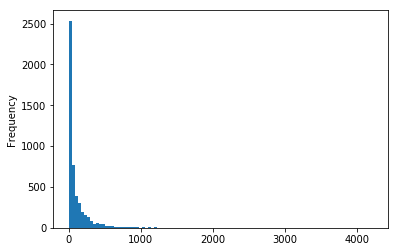

In [32]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot.hist(bins=100)

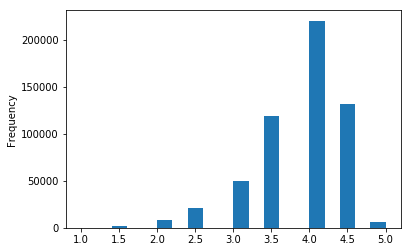

In [33]:
# look at average rate distribution
df_final['avg_stars'].plot.hist(bins = 20)
plt.show()

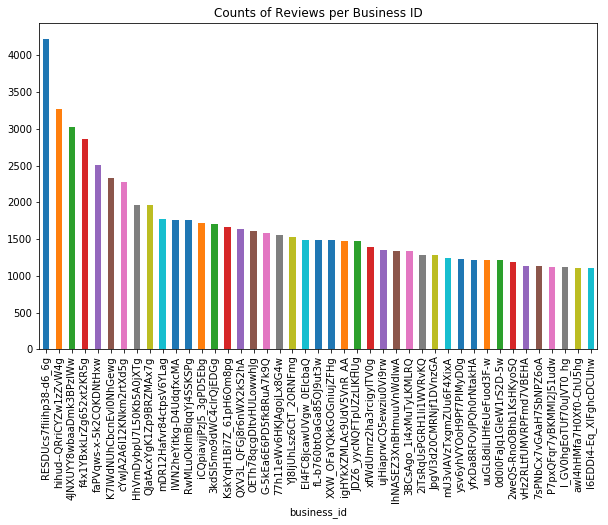

In [34]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final[['business_id','stars']].groupby('business_id')['stars'].\
agg('count').sort_values()[-1:-44:-1].plot.\
bar(title = 'Counts of Reviews per Business ID', figsize = (10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b916e190>,
      dtype=object)

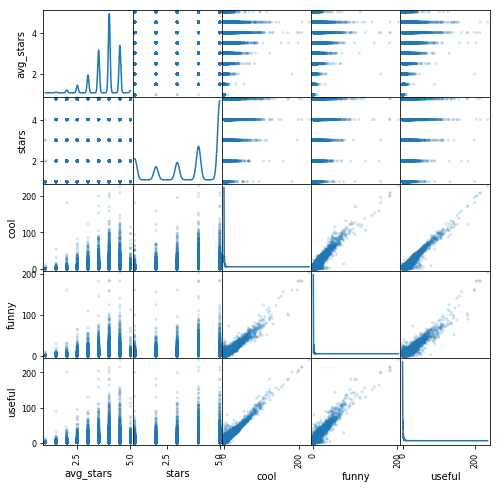

In [35]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_final[['avg_stars', 'stars', 'cool', 'funny', 'useful']],
              alpha = 0.2, figsize = (8,8),
              diagonal = 'kde')

## Save your preprocessed dataset to csv file

* Respect the laptop's hard work! You don't want to make it run everything again.

In [37]:
# Save to ./data/last_3_years_restaurant_reviews.csv for your next task
df_final.to_csv('yelp_dataset/last_3_years_restaurant_reviews.csv',encoding = 'utf-8')